Task_2

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Reading superset

In [2]:
final=pd.read_csv("../../../../data/stage_1/superset.csv")
final['Date']=final['Date'].astype('datetime64[ns]')

Selected Texas for doing statistical measures

In [3]:
cases_texas=final[final['State']=='TX']
cases_texas['new cases']=cases_texas['Cases'].diff()
cases_texas['new deaths']=cases_texas['Deaths'].diff()
cases_texas=cases_texas[cases_texas['Date']!='2020-01-22']

<ipython-input-3-eb1fe75628e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_texas['new cases']=cases_texas['Cases'].diff()
<ipython-input-3-eb1fe75628e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_texas['new deaths']=cases_texas['Deaths'].diff()


In [4]:
cases_texas['new cases'][cases_texas['new cases']<0]=0
cases_texas['new deaths'][cases_texas['new deaths']<0]=0
cases_texas['Cases_normalized']=round((cases_texas['new cases']/cases_texas['population'])*10000,3)
cases_texas['Deaths_normalized']=round((cases_texas['new deaths']/cases_texas['population'])*10000,3)

cases_texas=cases_texas.groupby(['Date']).sum().reset_index()

In [5]:
cases_texas['Cases_normalized']=cases_texas['Cases_normalized'].apply(np.ceil)
cases_texas['Deaths_normalized']=cases_texas['Deaths_normalized'].apply(np.ceil)


Calculating PMF

In [6]:
texas_mean=cases_texas['Cases_normalized'].mean()
texas_mean_deaths=cases_texas['Deaths_normalized'].mean()

In [7]:
cases_texas['PMF']=stats.poisson.pmf(k=round(cases_texas['Cases_normalized'],0),mu=texas_mean)
cases_texas['PMF_D']=stats.poisson.pmf(k=round(cases_texas['Deaths_normalized'],0),mu=texas_mean_deaths)

Removed some data as they are outliers for displaying

In [8]:
cases_texas_plot=cases_texas[cases_texas['Cases_normalized']<2500]

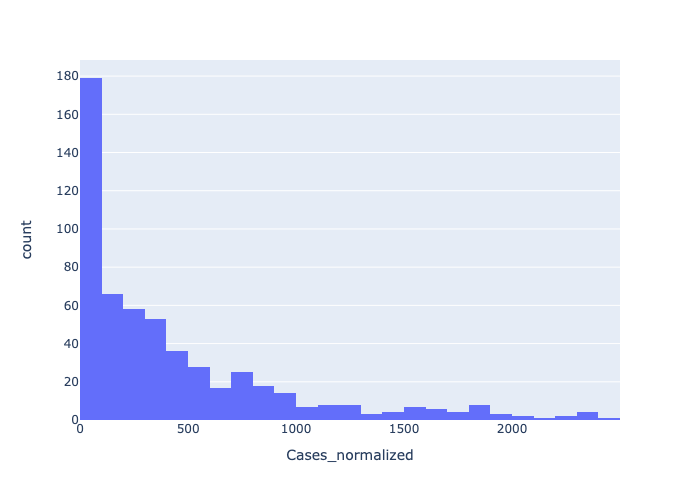

In [9]:
fig_cases_normalized=px.histogram(cases_texas_plot,x='Cases_normalized',title='plot of cases')
fig_cases_normalized.show('png')

From the above figure we can see our data is left skewed 

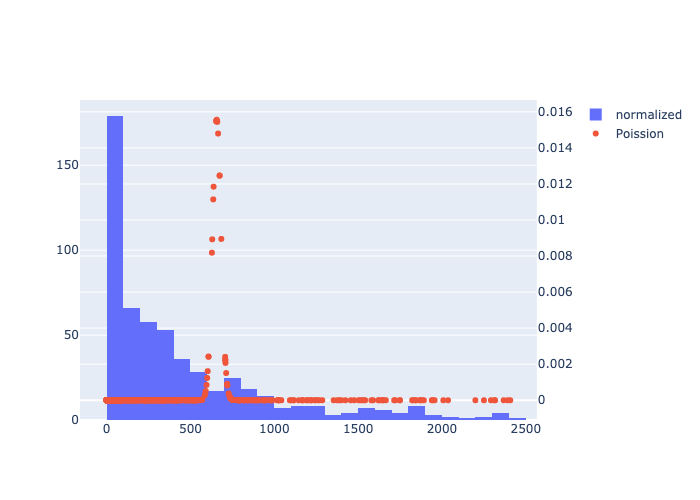

In [10]:
fig_plot=go.Figure()
fig_plot=make_subplots(specs=[[{"secondary_y":True}]])
fig_plot.add_trace(go.Histogram(x=cases_texas_plot['Cases_normalized'],name='normalized'))
fig_plot.add_trace(go.Scatter(x=cases_texas_plot['Cases_normalized'],y=cases_texas_plot['PMF'],mode='markers',name='Poission'),secondary_y=True)
fig_plot.show('png')

Center of distribution

In [11]:
cases_texas['Cases_normalized'].median()

269.0

Varinace

In [12]:
cases_texas['Cases_normalized'].var()

10126184.954732224

Skewness

In [13]:
cases_texas['Cases_normalized'].skew()

18.11817823798287

Kurtosis

In [14]:
cases_texas['Cases_normalized'].kurt()

358.87937828859407

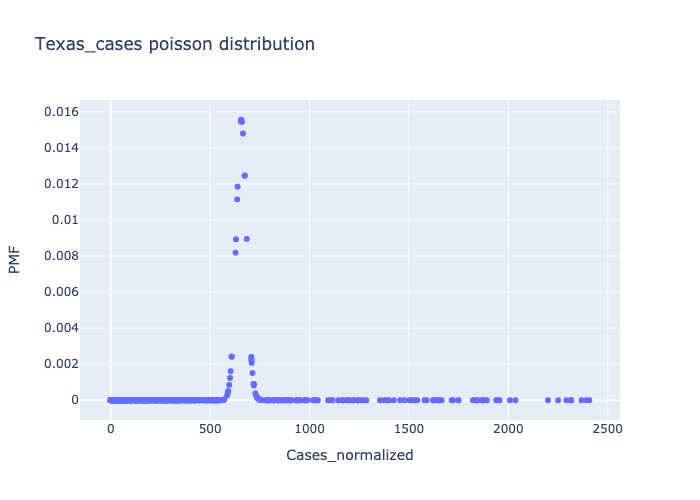

In [15]:
fig=px.scatter(cases_texas_plot,x=cases_texas_plot['Cases_normalized'],y=cases_texas_plot['PMF'],title='Texas_cases poisson distribution')
fig.show('png')

Selected NC,NY,FL,GA,AZ along with TX

In [16]:
six_states=final[final["State"].isin(['TX','NC','NY','FL','GA','AZ'])]
six_states['new cases']=six_states['Cases'].diff()
six_states['new deaths']=six_states['Deaths'].diff()
six_states=six_states[six_states['Date']!='2020-01-22']

<ipython-input-16-ec7c199382ae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-ec7c199382ae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
six_states['new cases'][six_states['new cases']<0]=0
six_states['new deaths'][six_states['new deaths']<0]=0
six_states['Cases_normalized']=round((six_states['new cases']/six_states['population'])*10000,3)
six_states['Deaths_normalized']=round((six_states['new deaths']/six_states['population'])*10000,3)
six_states=six_states.groupby(['Date','State']).sum().reset_index()


In [18]:
six_states['Cases_normalized']=six_states['Cases_normalized'].apply(np.ceil)
six_states['Deaths_normalized']=six_states['Deaths_normalized'].apply(np.ceil)
six_states

,Date,State,countyFIPS,StateFIPS,population,Deaths,Cases,new cases,new deaths,Cases_normalized,Deaths_normalized
0,2020-01-23,AZ,60208,60,7278717,0,0,0.0,0.0,0.0,0.0
1,2020-01-23,FL,808550,804,21477737,0,0,0.0,0.0,0.0,0.0
2,2020-01-23,GA,2092677,2067,10617423,0,0,0.0,0.0,0.0,0.0
3,2020-01-23,NC,3710000,3700,10488084,0,0,0.0,0.0,0.0,0.0
4,2020-01-23,NY,2235844,2232,19453561,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3427,2021-08-16,FL,808550,804,21477737,36973,2877213,0.0,0.0,0.0,0.0
3428,2021-08-16,GA,2092677,2067,10617423,21293,967951,13680.0,34.0,2272.0,8.0
3429,2021-08-16,NC,3710000,3700,10488084,13880,1122402,15096.0,54.0,1489.0,6.0
3430,2021-08-16,NY,2235844,2232,19453561,53403,2192336,3575.0,41.0,95.0,2.0


In [19]:
mean,mean_d=[],[]
for i in six_states['State'].unique():
    mean_state=six_states[six_states['State']==i]["Cases_normalized"].mean()
    mean_deaths=six_states[six_states['State']==i]["Deaths_normalized"].mean()
    mean.append(mean_state)   
    mean_d.append(mean_deaths) 
    print("mean of state_cases"+str(i),mean_state)
    print("mean of state_deathss"+str(i),mean_deaths)

mean of state_casesAZ 35.75524475524475
mean of state_deathssAZ 1.3548951048951048
mean of state_casesFL 153.75874125874125
mean of state_deathssFL 2.7674825174825175
mean of state_casesGA 250.6153846153846
mean of state_deathssGA 8.868881118881118
mean of state_casesNC 192.21153846153845
mean of state_deathssNC 3.3513986013986012
mean of state_casesNY 94.3479020979021
mean of state_deathssNY 2.2744755244755246
mean of state_casesTX 657.3444055944055
mean of state_deathssTX 13.223776223776223


In [20]:
cases_AZ=six_states[six_states['State']=='AZ']
cases_FL=six_states[six_states['State']=='FL']
cases_GA=six_states[six_states['State']=='GA']
cases_NC=six_states[six_states['State']=='NC']
cases_NY=six_states[six_states['State']=='NY']
cases_TX=six_states[six_states['State']=='TX']

In [21]:
cases_AZ['PMF']=stats.poisson.pmf(k=round(cases_AZ['Cases_normalized'],0),mu=mean[0])
cases_AZ['PMF_D']=stats.poisson.pmf(k=round(cases_AZ['Deaths_normalized'],0),mu=mean_d[0])
cases_FL['PMF']=stats.poisson.pmf(k=round(cases_FL['Cases_normalized'],0),mu=mean[1])
cases_FL['PMF_D']=stats.poisson.pmf(k=round(cases_FL['Deaths_normalized'],0),mu=mean_d[1])
cases_GA['PMF']=stats.poisson.pmf(k=round(cases_GA['Cases_normalized'],0),mu=mean[3])
cases_GA['PMF_D']=stats.poisson.pmf(k=round(cases_GA['Deaths_normalized'],0),mu=mean_d[3])
cases_NY['PMF']=stats.poisson.pmf(k=round(cases_NY['Cases_normalized'],0),mu=mean[2])
cases_NY['PMF_D']=stats.poisson.pmf(k=round(cases_NY['Deaths_normalized'],0),mu=mean_d[2])
cases_NC['PMF']=stats.poisson.pmf(k=round(cases_NC['Cases_normalized'],0),mu=mean[4])
cases_NC['PMF_D']=stats.poisson.pmf(k=round(cases_NC['Deaths_normalized'],0),mu=mean_d[4])
cases_TX['PMF']=stats.poisson.pmf(k=round(cases_TX['Cases_normalized'],0),mu=mean[5])
cases_TX['PMF_D']=stats.poisson.pmf(k=round(cases_TX['Deaths_normalized'],0),mu=mean_d[5])


<ipython-input-21-f1d2f9b42ca6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-f1d2f9b42ca6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-f1d2f9b42ca6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-f1d2f9b

In [22]:
frames=[cases_AZ,cases_FL,cases_NY,cases_NC,cases_GA,cases_TX]
six_states=pd.concat(frames)

Removing outlier for plotting

In [23]:
six_states_plot=six_states[six_states['Cases_normalized']<500]

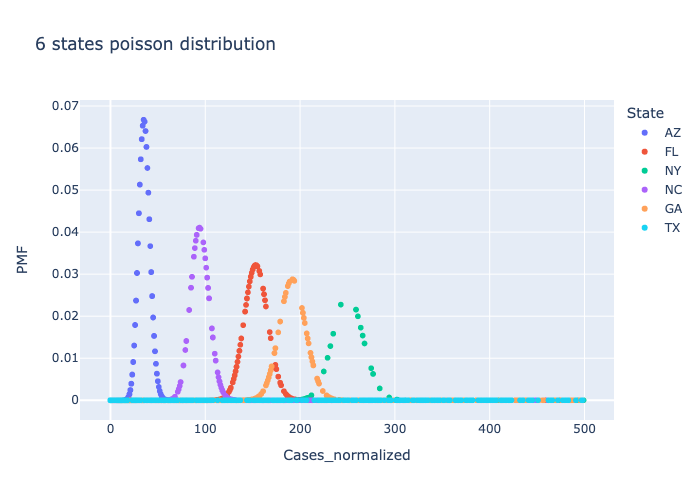

In [24]:
fig=px.scatter(six_states_plot,x='Cases_normalized',y='PMF',color='State',title='6 states poisson distribution')
fig.show('png')

In [25]:
six_states_death_plot=six_states[six_states['Deaths_normalized']<50]

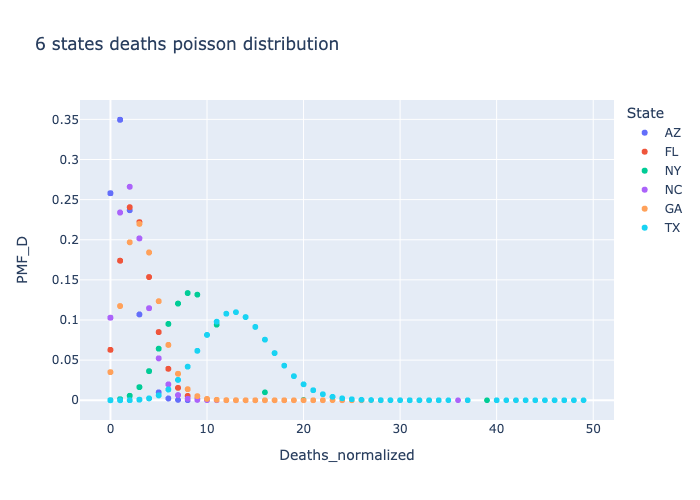

In [26]:
fig=px.scatter(six_states_death_plot,x='Deaths_normalized',y='PMF_D',color='State',title='6 states deaths poisson distribution')
fig.show('png')

NC counties -Guilford County ,Wake County 

In [27]:
nc=final[final['State']=='NC']
nc_county=nc[nc['County Name'].isin(['Guilford County ','Wake County '])]


In [28]:
nc_county['new cases']=nc_county['Cases'].diff()
nc_county['new deaths']=nc_county['Deaths'].diff()
nc_county=nc_county[nc_county['Date']!='2020-01-22']

<ipython-input-28-715cf241eef8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-715cf241eef8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
nc_county['new cases'][nc_county['new cases']<0]=0
nc_county['new deaths'][nc_county['new deaths']<0]=0
nc_county['Cases_normalized']=round((nc_county['new cases']/nc_county['population'])*1000000,3)
nc_county['Deaths_normalized']=round((nc_county['new deaths']/nc_county['population'])*1000000,3)

nc_county=nc_county.groupby(['Date','County Name']).sum().reset_index()

In [30]:
mean,mean_d=[],[]
for i in nc_county['County Name'].unique():
    mean_county=nc_county[nc_county['County Name']==i]["Cases_normalized"].mean()
    mean_deaths=nc_county[nc_county['County Name']==i]["Deaths_normalized"].mean()
    mean.append(mean_state)   
    mean_d.append(mean_deaths) 
    print("mean of state_cases"+str(i),mean_county)
    print("mean of state_deathss"+str(i),mean_deaths)

mean of state_casesGuilford County  171.61490909090912
mean of state_deathssGuilford County  2.4376923076923087
mean of state_casesWake County  157.95044055944055
mean of state_deathssWake County  1.2123164335664334


In [31]:
cases_GC=nc_county[nc_county['County Name']=='Guilford County ']
cases_WC=nc_county[nc_county['County Name']=='Wake County ']

In [32]:
cases_GC['PMF']=stats.poisson.pmf(k=round(cases_GC['Cases_normalized'],0),mu=mean[0])
cases_GC['PMF_D']=stats.poisson.pmf(k=round(cases_GC['Deaths_normalized'],0),mu=mean_d[0])
cases_WC['PMF']=stats.poisson.pmf(k=round(cases_WC['Cases_normalized'],0),mu=mean[1])
cases_WC['PMF_D']=stats.poisson.pmf(k=round(cases_WC['Deaths_normalized'],0),mu=mean_d[1])

<ipython-input-32-fc4f35712907>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-fc4f35712907>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-fc4f35712907>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-fc4f357

In [33]:
frames=[cases_GC,cases_WC]
nc_county=pd.concat(frames)
nc_county

,Date,County Name,countyFIPS,StateFIPS,population,Deaths,Cases,new cases,new deaths,Cases_normalized,Deaths_normalized,PMF,PMF_D
0,2020-01-23,Guilford County,37081,37,537174,0,0,0.0,0.0,0.000,0.000,3.303330e-286,0.087362
2,2020-01-24,Guilford County,37081,37,537174,0,0,0.0,0.0,0.000,0.000,3.303330e-286,0.087362
4,2020-01-25,Guilford County,37081,37,537174,0,0,0.0,0.0,0.000,0.000,3.303330e-286,0.087362
6,2020-01-26,Guilford County,37081,37,537174,0,0,0.0,0.0,0.000,0.000,3.303330e-286,0.087362
8,2020-01-27,Guilford County,37081,37,537174,0,0,0.0,0.0,0.000,0.000,3.303330e-286,0.087362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,2021-08-12,Wake County,37183,37,1111761,752,98065,655.0,0.0,589.155,0.000,4.133749e-04,0.297507
1137,2021-08-13,Wake County,37183,37,1111761,753,98698,633.0,1.0,569.367,0.899,3.319888e-05,0.360673
1139,2021-08-14,Wake County,37183,37,1111761,753,98698,0.0,0.0,0.000,0.000,3.303330e-286,0.297507
1141,2021-08-15,Wake County,37183,37,1111761,753,98698,0.0,0.0,0.000,0.000,3.303330e-286,0.297507


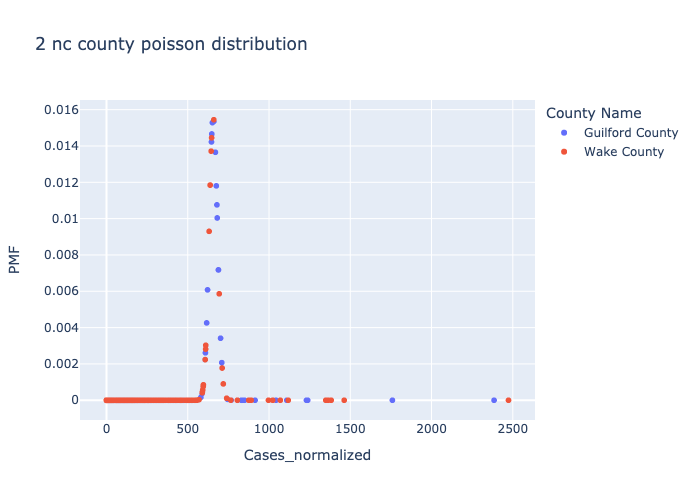

In [34]:
fig=px.scatter(nc_county,x='Cases_normalized',y='PMF',color='County Name',title='2 nc county poisson distribution')
fig.show('png')

In [44]:
nc_county_death=nc_county[nc_county['Deaths_normalized']<30]

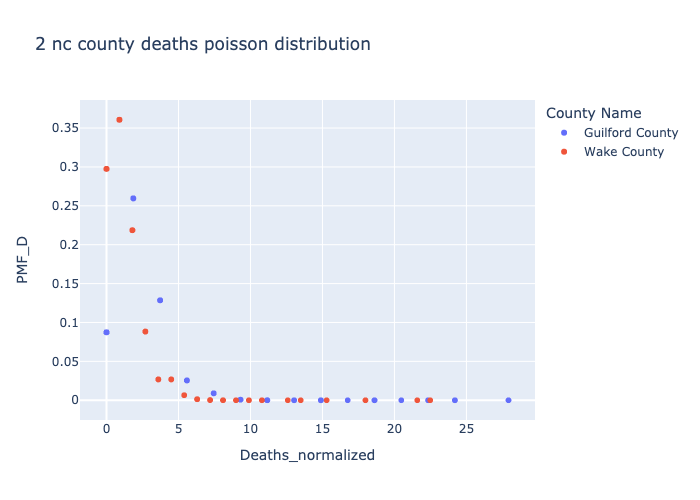

In [46]:
fig=px.scatter(nc_county_death,x='Deaths_normalized',y='PMF_D',color='County Name',title='2 nc county deaths poisson distribution')
fig.show('png')

Enrichment dataset

In [36]:
Enr=pd.read_csv("../../../../data/stage_1/EC.csv")

In [37]:
Enr.corr()

,countyFIPS,StateFIPS,population,Deaths,Cases,GEO_ID,DP05_0001E,DP05_0002E,DP05_0002PE,DP05_0003E,...,DP05_0017E,DP05_0018E,DP05_0030E,DP05_0031E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0052E,DP05_0070E
countyFIPS,1.000000,0.999975,-0.055270,-0.038026,-0.040975,1.000000,-0.055431,-0.055572,-0.001552,-0.055283,...,-0.066555,0.029364,-0.068991,-0.065934,-0.047882,-0.040669,-0.056977,-0.061085,-0.050118,-0.055431
StateFIPS,0.999975,1.000000,-0.054989,-0.037784,-0.040798,0.999975,-0.055149,-0.055289,-0.001228,-0.055001,...,-0.066163,0.030422,-0.068587,-0.065556,-0.047527,-0.040688,-0.056544,-0.060871,-0.049865,-0.055149
population,-0.055270,-0.054989,1.000000,0.721198,0.722446,-0.055270,0.999862,0.999819,-0.112226,0.999677,...,0.962793,-0.175235,0.981757,0.983376,0.978865,0.784845,0.563503,0.833022,0.381514,0.999862
Deaths,-0.038026,-0.037784,0.721198,1.000000,0.913236,-0.038026,0.724032,0.720815,-0.088037,0.726974,...,0.726004,-0.105927,0.718399,0.731247,0.681560,0.634003,0.399746,0.609432,0.203154,0.724032
Cases,-0.040975,-0.040798,0.722446,0.913236,1.000000,-0.040975,0.722868,0.722427,-0.073576,0.723130,...,0.698183,-0.126831,0.708133,0.711731,0.705974,0.571098,0.422841,0.575644,0.237601,0.722868
GEO_ID,1.000000,0.999975,-0.055270,-0.038026,-0.040975,1.000000,-0.055431,-0.055572,-0.001552,-0.055283,...,-0.066555,0.029364,-0.068991,-0.065934,-0.047882,-0.040669,-0.056977,-0.061085,-0.050118,-0.055431
DP05_0001E,-0.055431,-0.055149,0.999862,0.724032,0.722868,-0.055431,1.000000,0.999880,-0.112025,0.999888,...,0.964368,-0.174059,0.981742,0.983948,0.977082,0.786532,0.561352,0.836406,0.381321,1.000000
DP05_0002E,-0.055572,-0.055289,0.999819,0.720815,0.722427,-0.055572,0.999880,1.000000,-0.108031,0.999538,...,0.962831,-0.174849,0.981091,0.982680,0.977717,0.780074,0.563686,0.838583,0.385001,0.999880
DP05_0002PE,-0.001552,-0.001228,-0.112226,-0.088037,-0.073576,-0.001552,-0.112025,-0.108031,1.000000,-0.115855,...,-0.124909,-0.036693,-0.126468,-0.129905,-0.119045,-0.137887,-0.038577,-0.048736,-0.012708,-0.112025
DP05_0003E,-0.055283,-0.055001,0.999677,0.726974,0.723130,-0.055283,0.999888,0.999538,-0.115855,1.000000,...,0.965633,-0.173257,0.982147,0.984950,0.976248,0.792588,0.558970,0.834113,0.377681,0.999888


Hypopthesis
1.Are gender ,race and age groups playing major role in spread of covid.
2.What kind of popultation is more in places where death rates are high.
3.Are only largely populated states are affected more during covid.